In [8]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [9]:
data = datasets.fetch_lfw_people(min_faces_per_person=5)
data

{'data': array([[ 83.      ,  94.666664,  78.666664, ..., 241.      , 233.33333 ,
         230.66667 ],
        [249.      , 249.66667 , 249.66667 , ...,  54.      ,  48.666668,
          43.666668],
        [ 59.666668,  70.333336,  79.333336, ..., 115.333336,  78.666664,
          74.666664],
        ...,
        [110.666664,  88.666664,  59.666668, ..., 104.      ,  39.666668,
          44.      ],
        [ 56.      ,  61.666668,  79.333336, ...,   8.666667,   9.      ,
           8.666667],
        [ 30.666666,  43.      ,  55.      , ...,  17.333334,  16.666666,
          20.666666]], dtype=float32),
 'images': array([[[ 83.      ,  94.666664,  78.666664, ...,  54.      ,
           81.666664,  82.333336],
         [ 92.333336,  97.333336,  80.333336, ...,  52.666668,
           73.333336,  81.333336],
         [ 98.666664,  95.666664,  79.333336, ...,  60.333332,
           74.      ,  78.333336],
         ...,
         [ 38.      ,  35.333332,  34.666668, ..., 240.66667 ,
     

In [10]:
data.data.shape

(4225, 2914)

In [11]:
data.images.shape

(4225, 62, 47)

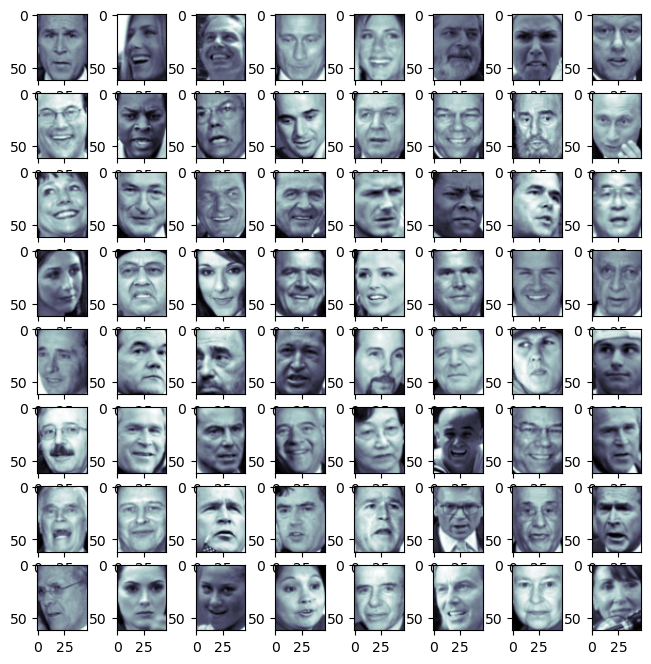

In [12]:
fig = plt.figure(figsize=(8, 8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(data.images[i], cmap=plt.cm.bone)

In [13]:
def find_k(data, s):
    pca = PCA()
    pca.fit_transform(data.data)
    
    k = 0
    total_sum = sum(pca.explained_variance_)
    current = 0
    while current/total_sum < s:
        current += pca.explained_variance_[k]
        k += 1
    return k

In [14]:
find_k(data.data, 0.99)

500

In [16]:
find_k(data.data, 0.97)

261

In [17]:
find_k(data.data, 0.95)

177

In [18]:
X = data.data
Y = data.target

In [19]:
X.shape, Y.shape

((4225, 2914), (4225,))

In [20]:
pca = PCA(n_components=177)
train_transform = pca.fit_transform(X)

In [21]:
data.images.shape

(4225, 62, 47)

In [23]:
inversed_data = pca.inverse_transform(train_transform)
train_data = inversed_data.reshape((4225, 62, 47))
train_data.shape

(4225, 62, 47)

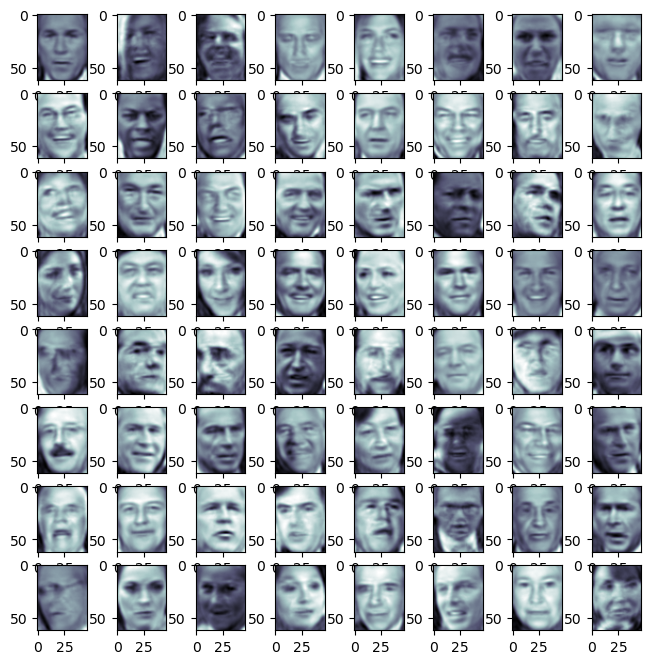

In [25]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8, i+1)
    ax.imshow(train_data[i], cmap=plt.cm.bone)

In [27]:
eigenvectors = pca.components_
eigenvectors.shape

(177, 2914)

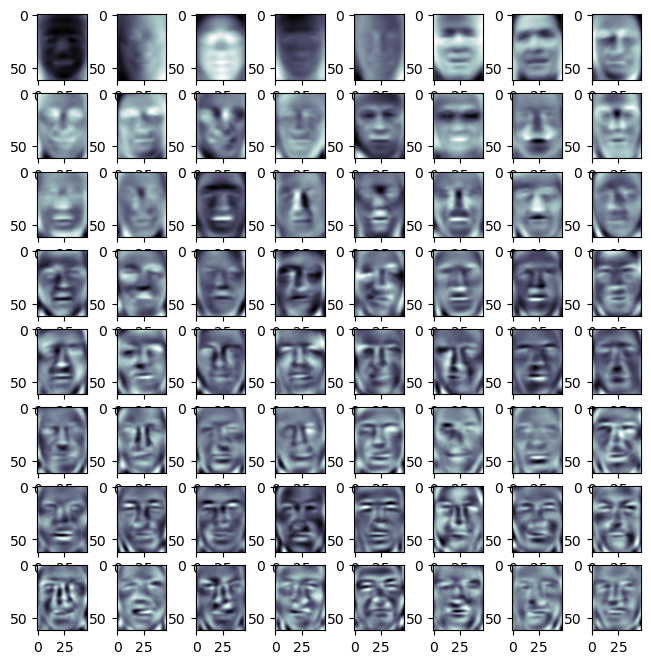

In [31]:
eigenfaces = eigenvectors.reshape((177, 62, 47))
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigenfaces[i], cmap=plt.cm.bone)